# Empirical Wildfire Modelling Tools

This notebook presents national databases used to study wildfires and explains
how to run simulations with empirical models.

You need [Anaconda](https://www.anaconda.com/download) to run this notebook.
Create the virtual environment with:

```
conda create --name <name of your choice> --file requirements.txt
```

## 1. LANDFIRE Data

The [LANDFIRE online viewer](https://www.landfire.gov/viewer/) contains numerous data for the United
States (continental territories and Hawaii).
[FlamMap](https://research.fs.usda.gov/firelab/products/dataandtools/flammap), a fire modelling
tool, requires eight data layers to create a valid landscape. To obtain them, you can:

- Access the LANDFIRE viewer at https://www.landfire.gov/viewer/.
- Click on the "Data Download Tool" (downward-pointing arrow icon in the top ribbon).
- Pick a selection method in the dialog box appearing in the right panel (e.g. "Rectangle").
- Select a region on the map.
- In the Data Download Tool dialog box, select a landfire directory (e.g. "LF 2024 (LF_250)") and
  then navigate in "Fuel" and "Surface and Canopy". Select the 8 "Surface and Canopy" files.
- In the "Topographic" directory, select the 4 files.
- Provide a valid email address at the bottom of the Data Download Tool dialog box.
- CLick on "Download".

Let's now analyze the content of each file.

### 1.1. Topology

Topology is the 3D shape of the area. Let's visualize it with Python:

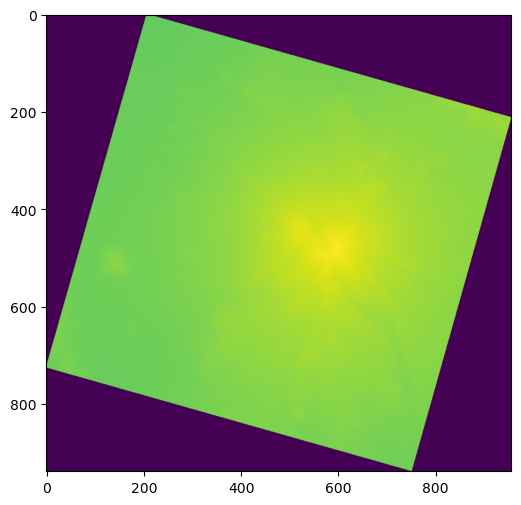

In [ ]:
from osgeo import gdal, osr
import matplotlib.pyplot as plt
import numpy as np

# This landscape file is included in the repository, but you can use your own
# downloaded file by editing the filepath.
filepath = "data/elevation.tif"

ds = gdal.Open(filepath, gdal.GA_ReadOnly)
rb = ds.GetRasterBand(1)
img_array = rb.ReadAsArray()
plt.figure(figsize = (6, 6))
plt.imshow(img_array)
plt.show()

Lighter areas indicate more elevated ground level.

### 1.2. Canopy Height

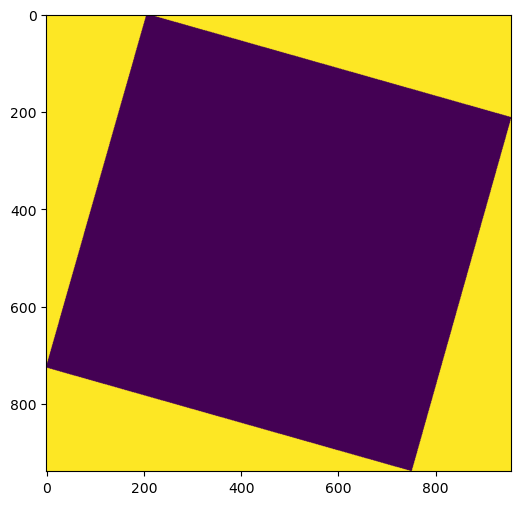

In [3]:
from osgeo import gdal, osr
import matplotlib.pyplot as plt
import numpy as np

# This landscape file is included in the repository, but you can use your own
# downloaded file by editing the filepath.
filepath = "data/canopy_height.tif"

ds = gdal.Open(filepath, gdal.GA_ReadOnly)
rb = ds.GetRasterBand(1)
img_array = rb.ReadAsArray()
plt.figure(figsize = (6, 6))
plt.imshow(img_array)
plt.show()

It doesn't look as nice as the other figure because canopy height is
represented with a lookup table. The value in each cell does not represent an
actual value but rather corresponds to a particular height as defined in the
following table:

In [ ]:
# The original format of this file is `dbf` but I converted it to a
# UTF-8-encoded CSV file to avoid encoding errors.
filepath = "data/canopy_height_lookup_table.csv"
with open(filepath, "r", encoding="cp850") as file:
    content = file.read()
print(content)

"VALUE,N,10,0","METERSX10,C,254","METERS,C,254","R,N,10,0","G,N,10,0","B,N,10,0","RED,N,19,11","GREEN,N,19,11","BLUE,N,19,11"
-9999,Fill-NoData,Fill-NoData,255,255,255,1,1,1
0,Non-Forested,Non-Forested,0,0,0,0,0,0
1,CBH = 01 meters X 10,CBH = 00.1 meters,255,170,0,1,"0,666667",0
2,CBH = 02 meters X 10,CBH = 00.2 meters,250,169,5,"0,980392","0,662745","0,019608"
3,CBH = 03 meters X 10,CBH = 00.3 meters,248,168,7,"0,972549","0,658824","0,027451"
4,CBH = 04 meters X 10,CBH = 00.4 meters,245,167,10,"0,960784","0,654902","0,039216"
5,CBH = 05 meters X 10,CBH = 00.5 meters,243,167,12,"0,952941","0,654902","0,047059"
6,CBH = 06 meters X 10,CBH = 00.6 meters,240,166,14,"0,941176","0,65098","0,054902"
7,CBH = 07 meters X 10,CBH = 00.7 meters,238,165,17,"0,933333","0,647059","0,066667"
8,CBH = 08 meters X 10,CBH = 00.8 meters,235,164,19,"0,921569","0,643137","0,07451"
9,CBH = 09 meters X 10,CBH = 00.9 meters,233,163,21,"0,913725","0,639216","0,082353"
10,CBH = 10 meters X 10,CBH = 01 meters,230,

So the value -9999 is actually a blank cell (i.e. no data) and the other cells
match the height in meters. Let's eliminate the blank cells to visualize it
better:

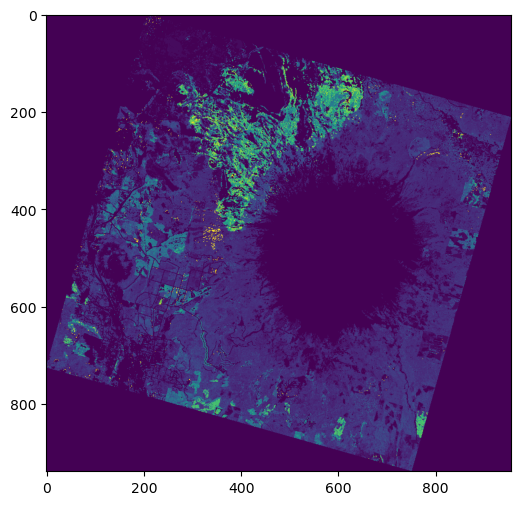

In [7]:
img_array[img_array == img_array[0][0]] = 0
plt.figure(figsize = (6, 6))
plt.imshow(img_array)
plt.show()

This makes sense: the top of the mountain has a lower canopy and more flat
areas have a higher one.

FARSITE simulations need other parameters but I'll just present these two.

## 2. FARSITE Simulation

We'll use FARSITE to run fire propagation simulations.

1. First, you need to obtain FlamMap at https://research.fs.usda.gov/firelab/products/dataandtools/flammap
  (FARSITE is part of FlamMap).
2. Open FlamMap after you have installed it.
3. In the `Landscape` section, click on `create landscape file`.
4. Navigate in the file explorer to select the data downloaded from LANDFIRE. This will open a
  FlamMap landscape onto which you can run simulations.
5. In the left panel, right-click on `Runs` and click on `New Farsite Run`.
6. You need to configure the properties of the simulation:

   - Create a weather file describing meteorological conditions (see the example at `data/weather.wsx`)
   - Define an ignition point or shape (see the example at `data/dot.shp`)
   - You can leave other parameters at their default values.

7. Launch the simulation.

If things go well, you should see results comparable to that:

![canopy bulk density](assets/canopy_bulk_density.png)

That's the fire perimeter over time plotted over canopy bulk density.

![arrival time](assets/arrival_time.png)

That's the arrival time of the fire front. The yellow area is closer to the ignition point and
the outer red area correspond to later arrival times.